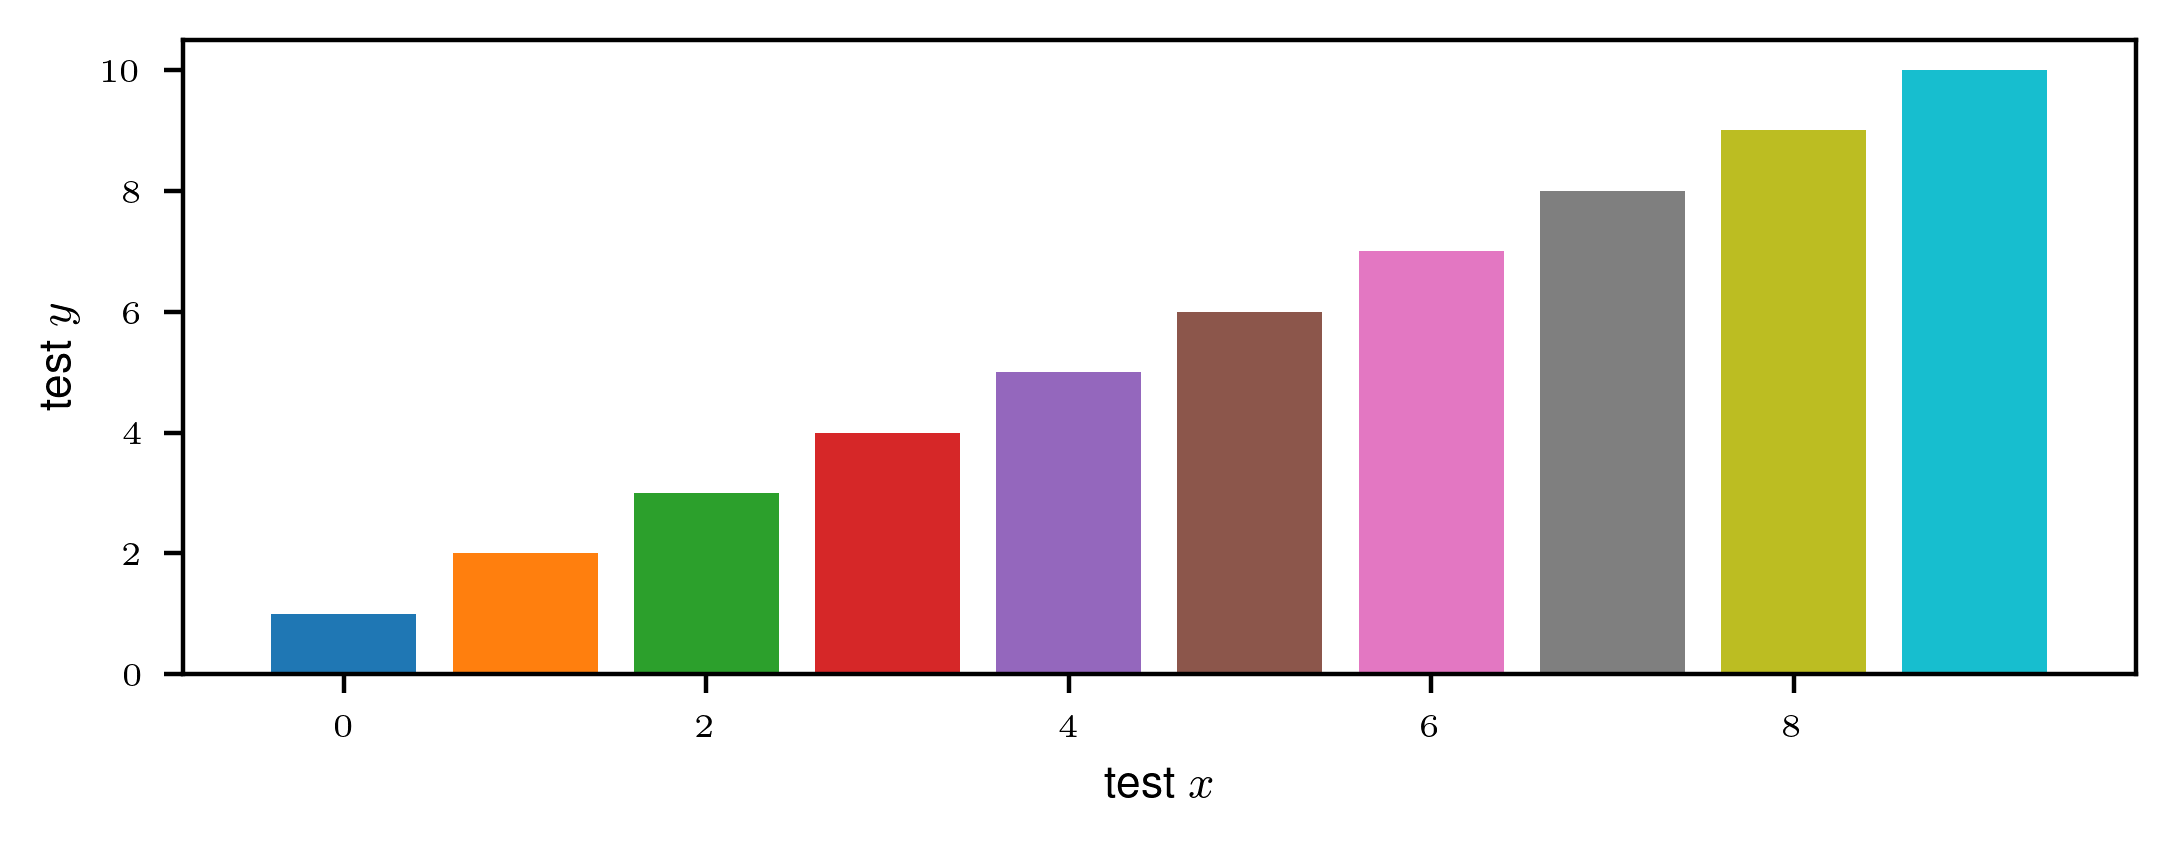

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines

text_width = 6.30107 # in  --> Confirmed with template explanation

fs_m1 = 6  # for figure ticks
fs = 8  # for regular figure text
fs_p1 = 9  # figure titles

matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs_m1)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title


matplotlib.rc('font', **{'family':'sans-serif', 'sans-serif': ['Helvetica']})
matplotlib.rc('text', usetex=True)

plt.figure(dpi=400, figsize=(text_width, text_width/3))
for i in range(10):
       plt.bar(i, i + 1, color=f'C{i}', zorder=2)
       # ^ This zorder nonsense makes the grid  lines go behid the bars. I don't know why this is needed for barplots, but shouldn't usually be needed.
# plt.title('\\textbf{Test}, $\\mathcal{C}, \\mathbb{R}$')
plt.xlabel('test $x$')
plt.ylabel('test $y$')
plt.show()

plt.style.use(['paper.mplstyle'])

In [2]:
scan_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams_continuous_abg_2"
# skew_scan_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams/monkeys_0.01_0.0000003_9.0/ramping_skew_rads"
# rdn_scan_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams/monkeys_0.01_0.0000003_9.0/ramping_rdn_rads"
spectral_abscissas = [0.0, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
skew_radii = [0.1, 0.5, 0.8, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.7, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.7, 11.0, 12.0, 12.5, 13.0, 14.0, 15.]
soc_radii = [0.1, 0.8, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 0.3, 0.5, 0.7, 0.8, 1.0, 1.1, 1.3, 1.4, 1.6, 1.7, 1.8, 1.9, 2.1,0.2, 0.4, 0.6, 0.9, 1.3, 2.2, 2.7, 3.2,3.4,3.5,3.6, 3.7]
#, 5.0, 5.5, 6.0, 6.5, 10.0, 3.1, 3.4, 3.6, 3.8, 4.1, 4.2,4.3, 4.6, 4.9, 5.2, 5.3, 5.4, 5.7, 5.9]
rdn_radii = [0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
n_targets = 8
def get_pi_rads(dir, radii, typ):
    norms = []
    sas = []
    srs = []
    pis = []
    for rad in radii :
        for sa in spectral_abscissas :
            pi = 0
            k = 0
            for n in range(n_targets):
                for s in [0,1,2,4]:
                    try : 
                        if typ == "rdn":
                            res = np.loadtxt(f"{dir}/rdn_{n}_{rad}_{rad}_{s}")
                        elif typ == "skew": 
                            res = np.loadtxt(f"{dir}/skew_{n}_{rad}_{sa}_{s}")
                        elif typ == "soc": 
                            res = np.loadtxt(f"{dir}/soc_{n}_{rad}_0.8_{s}")
                        pi += res[2]
                        k += 1
                    except : 
                        assert True
            if k > 0 :
                norms.append(res[1])
                sas.append(res[-1])
                srs.append(res[-2])
                pis.append(pi/k)
    return np.asarray(norms), np.asarray(pis), np.asarray(sas), np.asarray(srs)

def get_pi_sas(dir, typ):
    norms = []
    sas = []
    srs = []
    pis = []
    rad = 1.5 if typ=="soc" else 4.0
    for sa in spectral_abscissas :
        pi = 0
        k = 0
        for n in range(n_targets):
            for s in [0,1,2]:
                    try : 
                        if typ == "rdn":
                            res = np.loadtxt(f"{dir}/rdn_{n}_{rad}_0.0_{s}")
                        elif typ == "skew": 
                            res = np.loadtxt(f"{dir}/skew_{n}_{rad}_0.0_{s}")
                        elif typ == "soc": 
                            res = np.loadtxt(f"{dir}/soc_{n}_{rad}_0.8_{s}")
                        pi += res[2]
                        k += 1
                    except : 
                        assert True
        if k > 0 :
            norms.append(res[1])
            sas.append(res[-1])
            srs.append(res[-2])
            pis.append(pi/k)
    return np.asarray(norms), np.asarray(pis), np.asarray(sas), np.asarray(srs)


In [3]:
def get_all_pi_rads(dir, radii, typ):
    norms = []
    pis = []
    alphas = []
    betas = []
    gammas = []
    alphas_c = []
    for rad in radii :
        for sa in spectral_abscissas :
            loc_gammas, loc_alphas, loc_betas, loc_alphas_c, loc_norms, loc_pis = [], [], [], [], [], []
            for n in range(n_targets):
                for s in [0,1,2]:
                    try : 
                        res = np.loadtxt(f"{dir}/{typ}_{n}_{rad}_{sa}_{s}")
                        if typ == "rdn":
                            #gamma = np.loadtxt(f"{dir}/g_full_{typ}_{rad}_0.0_{s}_{n}")
                            res = np.loadtxt(f"{dir}/{typ}_{n}_{rad}_{rad}_{s}")
                            alpha = np.loadtxt(f"{dir}/alphas_cbar_{typ}_{rad}_0.0_{s}_{n}")
                            alpha_c = np.loadtxt(f"{dir}/alphas_c_{typ}_{rad}_0.0_{s}_{n}")
                            beta = np.loadtxt(f"{dir}/betas_cbar_{typ}_{rad}_0.0_{s}_{n}")
                            #tr_obs =  np.loadtxt(f"{dir}/tr_obs_{typ}_{rad}_0.0_{s}_{n}")
                            
                        elif typ == "skew":
                            #gamma = np.loadtxt(f"{dir}/g_full_{typ}_{rad}_0.0_{s}_{n}")
                            res = np.loadtxt(f"{dir}/{typ}_{n}_{rad}_0.0_{s}")
                            alpha = np.loadtxt(f"{dir}/alphas_cbar_{typ}_{rad}_0.0_{s}_{n}")
                            alpha_c = np.loadtxt(f"{dir}/alphas_c_{typ}_{rad}_0.0_{s}_{n}")
                            beta = np.loadtxt(f"{dir}/betas_cbar_{typ}_{rad}_0.0_{s}_{n}")
                            #tr_obs = np.loadtxt(f"{dir}/tr_obs_{typ}_{rad}_0.0_{s}_{n}")
                        else :
                            #gamma = np.loadtxt(f"{dir}/g_full_{typ}_{rad}_0.8_{s}_{n}")
                            res = np.loadtxt(f"{dir}/{typ}_{n}_{rad}_0.8_{s}")
                            alpha = np.loadtxt(f"{dir}/alphas_cbar_{typ}_{rad}_0.8_{s}_{n}")
                            alpha_c = np.loadtxt(f"{dir}/alphas_c_{typ}_{rad}_0.8_{s}_{n}")
                            beta = np.loadtxt(f"{dir}/betas_cbar_{typ}_{rad}_0.8_{s}_{n}")
                            #tr_obs = np.loadtxt(f"{dir}/tr_obs_{typ}_{rad}_0.8_{s}_{n}")
                        if np.mean(beta) > 0:
                            loc_pis.append(res[2])
                            loc_norms.append(res[1])
                            abetas = np.sort(beta*alpha)
                            #alphas.append(np.sum(abetas))
                            loc_alphas.append(np.mean(alpha*beta)/np.mean(beta))
                            loc_betas.append(np.mean(beta))
                            #loc_gammas.append(np.mean(gamma))
                            loc_alphas_c.append(np.mean(alpha_c))
                    except : 
                        assert True
                        
            if np.shape(loc_alphas)[0] > 0:
                alphas.append(np.mean(loc_alphas)) 
                betas.append(np.mean(loc_betas))  
                gammas.append(np.mean(loc_gammas))  
                norms.append(np.mean(loc_norms))
                pis.append(np.mean(loc_pis))
                alphas_c.append(np.mean(loc_alphas_c))
    _, idces_unique = np.unique(np.asarray(pis), return_index = True)
    return np.asarray(norms)[idces_unique], np.asarray(pis)[idces_unique], np.asarray(alphas)[idces_unique], np.asarray(betas)[idces_unique], np.asarray(gammas)[idces_unique],  np.asarray(alphas_c)[idces_unique]



/home/mmcs3/.virtualenvs/why-prep/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mmcs3/.virtualenvs/why-prep/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(75,)


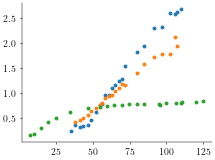

In [4]:
soc_norms, soc_pis, soc_alphas, soc_betas, soc_gammas, soc_alphas_c  = get_all_pi_rads("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/eval_rad_abg", soc_radii, "soc")
plt.scatter(soc_norms, soc_alphas)
n_min, n_max = np.min(soc_norms), np.max(soc_norms)
n_bins = 1000
soc_locs = []
prep_idces = []
soc_alphas_binned = []
soc_betas_binned = []
soc_gammas_binned = []
soc_alphas_c_binned = []
for i in range(n_bins):
    loc_min = n_min + i/n_bins*(n_max - n_min)
    loc_max = n_min + (i+1)/n_bins*(n_max - n_min)
    idces= np.argwhere((loc_min < soc_norms) & (soc_norms < loc_max))
    ppis = soc_pis[idces]
    alphas = soc_alphas[idces]
    if np.shape(alphas)[0] > 0 : 
        soc_alphas_binned.append(np.mean(alphas))
        betas = soc_betas[idces]
        soc_betas_binned.append(np.mean(betas))
        gammas = soc_gammas[idces]
        soc_gammas_binned.append(np.mean(gammas))
        prep_idces.append(np.mean(ppis))
        soc_locs.append((loc_min + loc_max)/2)
        soc_alphas_c_binned.append(np.mean(soc_alphas_c))

plt.scatter(soc_locs, prep_idces)
rdn_norms, rdn_pis, rdn_alphas, rdn_betas, rdn_gammas, rdn_alphas_c= get_all_pi_rads("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/eval_rad_abg", rdn_radii, "rdn")
n_min, n_max = np.min(rdn_norms), np.max(rdn_norms)


skew_norms, skew_pis, skew_alphas, skew_betas, skew_gammas, skew_alphas_c = get_all_pi_rads("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/eval_rad_abg", skew_radii, "skew")
print(skew_norms.shape)
n_min, n_max = np.min(skew_norms), np.max(skew_norms)
n_bins = 200
skew_locs = []
prep_idces_skew = []
skew_alphas_binned = []
skew_betas_binned = []
skew_gammas_binned = []
skew_alphas_c_binned = []
for i in range(n_bins):
    loc_min = n_min + i/n_bins*(n_max - n_min)
    loc_max = n_min + (i+1)/n_bins*(n_max - n_min) 
    idces= np.argwhere((loc_min < skew_norms) & (skew_norms < loc_max))
    ppis = skew_pis[idces]
    alphas = skew_alphas[idces]
    if np.shape(alphas)[0] > 0 : 
        skew_locs.append((loc_min + loc_max)/2)
        prep_idces_skew.append(np.mean(ppis))
        skew_alphas_binned.append(np.mean(alphas))
        betas = skew_betas[idces]
        skew_betas_binned.append(np.mean(betas))
        gammas = skew_gammas[idces]
        skew_gammas_binned.append(np.mean(gammas))
        skew_alphas_c_binned.append(np.mean(skew_alphas_c))

plt.scatter(skew_locs, prep_idces_skew)


n_bins = 200
rdn_locs = []
prep_idces_rdn = []
rdn_alphas_binned = []
rdn_betas_binned = []
rdn_gammas_binned = []
rdn_alphas_c_binned = []
for i in range(n_bins):
    loc_min = n_min + i/n_bins*(n_max - n_min)
    loc_max = n_min + (i+1)/n_bins*(n_max - n_min)
    idces= np.argwhere((loc_min < rdn_norms) & (rdn_norms < loc_max))
    ppis = rdn_pis[idces]
    alphas = rdn_alphas[idces]
    if np.shape(alphas)[0] > 0 : 
        betas = rdn_betas[idces]
        gammas = rdn_gammas[idces]
        rdn_locs.append((loc_min + loc_max)/2)
        prep_idces_rdn.append(np.mean(ppis))
        rdn_alphas_binned.append(np.mean(alphas))
        rdn_betas_binned.append(np.mean(betas))
        rdn_gammas_binned.append(np.mean(gammas))
        rdn_alphas_c_binned.append(np.mean(rdn_alphas_c))
soc_alphas_binned,soc_betas_binned, soc_gammas_binned, soc_alphas_c_binned = np.asarray(soc_alphas_binned),np.asarray(soc_betas_binned), np.asarray(soc_gammas_binned), np.asarray(soc_alphas_c_binned)
rdn_alphas_binned,rdn_betas_binned, rdn_gammas_binned, rdn_alphas_c_binned = np.asarray(rdn_alphas_binned),np.asarray(rdn_betas_binned), np.asarray(rdn_gammas_binned), np.asarray(rdn_alphas_c_binned)
skew_alphas_binned,skew_betas_binned, skew_gammas_binned, skew_alphas_c_binned = np.asarray(skew_alphas_binned),np.asarray(skew_betas_binned), np.asarray(skew_gammas_binned), np.asarray(skew_alphas_c_binned)


In [5]:
print(len(rdn_alphas_binned), len(soc_alphas_binned), len(skew_alphas_binned))
rdn_alphas_binned = np.repeat(rdn_alphas_binned, 3)
rdn_betas_binned = np.repeat(rdn_betas_binned, 3)
rdn_gammas_binned = np.repeat(rdn_gammas_binned, 3)
prep_idces_rdn = np.repeat(prep_idces_rdn, 3)
rdn_alphas_c_binned = np.repeat(rdn_alphas_c_binned, 3)
#soc_alphas_binned = np.repeat(soc_alphas_binned, )
#soc_betas_binned = np.repeat(soc_betas_binned, 5)
#soc_gammas_binned = np.repeat(soc_gammas_binned, 5)
#prep_idces = np.repeat(prep_idces, 5)

6 22 22


In [6]:
rdn_norms_binned, prep_idces_rdn, rdn_alphas_binned, rdn_betas_binned, rdn_gammas_binned, rdn_alphas_c_binned = get_all_pi_rads("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/eval_rad_abg", rdn_radii, "rdn")

print(np.shape(rdn_norms_binned))
assert np.shape(rdn_norms_binned)[0] > 0 

soc_norms_binned, prep_idces, soc_alphas_binned, soc_betas_binned, soc_gammas_binned, soc_alphas_c_binned   = get_all_pi_rads("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/eval_rad_abg", soc_radii, "soc")




skew_norms_binned, prep_idces_skew, skew_alphas_binned, skew_betas_binned, skew_gammas_binned, skew_alphas_c_binned  = get_all_pi_rads("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/eval_rad_abg", skew_radii, "skew")



(18,)


[0.08561838 0.09198482 0.116562   0.129393   0.1298238  0.132992
 0.146634   0.1479974  0.15234317 0.15568367 0.1575025  0.15752167
 0.182      0.18467925 0.1860685  0.200321   0.2008736  0.2064005 ]


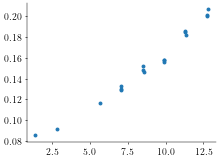

In [7]:
#plt.scatter(skew_norms, prep_idces_skew)
print(prep_idces_rdn)
plt.scatter(rdn_norms_binned, prep_idces_rdn)
#plt.scatter(soc_norms, prep_idces)

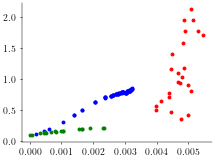

In [8]:
expo = 0.9
plt.scatter(soc_betas/(soc_alphas)**expo, soc_pis, color = "red", label = "ISNs")
plt.scatter(skew_betas/(skew_alphas)**expo, skew_pis, color = "blue", label = "Skews")
plt.scatter(rdn_betas/(rdn_alphas)**expo, rdn_pis, color = "green", label = "Rdn")

(24,) (24,)


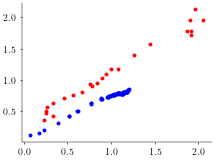

In [9]:
print(soc_betas.shape, soc_pis.shape)
plt.scatter(soc_betas/np.mean(soc_betas), soc_pis, color = "red", label = "ISNs")
plt.scatter(skew_betas/np.mean(skew_betas),skew_pis, color = "blue", label = "Skews")
#plt.scatter(rdn_betas/np.mean(rdn_betas), rdn_pis, color = "yellow", label = "Rdn")

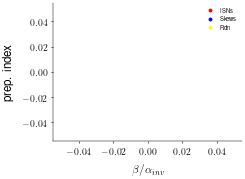

In [10]:
plt.scatter(soc_gammas_binned, prep_idces,color = "red", label = "ISNs")
plt.scatter(skew_gammas_binned, prep_idces_skew, color = "blue", label = "Skews")
plt.scatter(rdn_gammas_binned, prep_idces_rdn, color = "yellow", label = "Rdn")
plt.legend()
plt.xlabel("$\\beta/\\alpha_{inv}$")
plt.ylabel("prep. index")
plt.savefig("alpha_beta_summed.pdf")

24 75 18


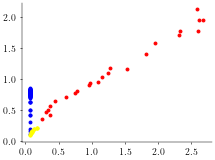

<Figure size 245x183.75 with 0 Axes>

In [11]:
plt.scatter(soc_alphas_binned, prep_idces,color = "red", label = "ISNs")
plt.scatter(skew_alphas_binned, prep_idces_skew, color = "blue", label = "Skews")
plt.scatter(rdn_alphas_binned, prep_idces_rdn, color = "yellow", label = "Rdn")
plt.figure()
print(len(soc_alphas_binned), len(skew_alphas_binned),len(rdn_alphas_binned))

In [12]:
def transfo_b(b):
    return b
def transfo_g(g):
    return g

def transfo_a(a):
    return 0*a


def transfo_d(a):
    return 0*np.log(a)

def transfo_prep(p):
    p = np.asarray([pi for pi in p])
    return p


print(rdn_betas_binned <0)
print(np.min(prep_idces_rdn))
p_soc, p_skew, p_rdn = transfo_prep(prep_idces), transfo_prep(prep_idces_skew), transfo_prep(prep_idces_rdn)
g_soc, g_skew, g_rdn =transfo_g(soc_alphas_c_binned), transfo_g(skew_alphas_c_binned), transfo_g(rdn_alphas_c_binned)
a_soc, a_skew, a_rdn = transfo_a(soc_alphas_binned), transfo_a(skew_alphas_binned), transfo_a(rdn_alphas_c_binned)
b_soc, b_skew, b_rdn = transfo_b(soc_betas_binned), transfo_b(skew_betas_binned), transfo_b(rdn_betas_binned)
all_prep_idces = np.concatenate([p_soc, p_skew, p_rdn])[:,None]
all_gammas = np.concatenate([g_soc, g_skew, g_rdn])
all_alphas = np.concatenate([a_soc, a_skew, a_rdn])
all_betas = np.concatenate([b_soc, b_skew, b_rdn])
n = all_prep_idces.shape[0]
shuffled_idces = np.random.permutation(np.arange(n))
train_idces, test_idces = shuffled_idces[:int(n/2)], shuffled_idces[int(n/2):]
all_abg = np.concatenate([all_betas[:,None], all_alphas[:,None], all_gammas[:,None]], axis=1)
all_abg_soc = np.concatenate([b_soc[:,None],np.asarray(a_soc[:,None]), g_soc[:,None]], axis=1)
all_abg_skew = np.concatenate([b_skew[:,None],np.asarray(a_skew[:,None]), g_skew[:,None]], axis=1)
all_abg_rdn = np.concatenate([b_rdn[:,None],np.asarray(a_rdn[:,None]),g_rdn[:,None]], axis=1)

[False False False False False False False False False False False False
 False False False False False False]
0.08561838000000001


(117, 3)


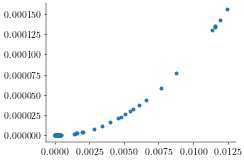

0.9909395822441022 [[ 2.21720682e+03  7.17889115e-05 -1.09709361e+01 -4.24272738e+05
   5.82076609e-11  2.84608494e+03  0.00000000e+00  0.00000000e+00
  -3.53248240e+00]]
[[ 2.21720682e+03  7.17889115e-05 -1.09709361e+01 -4.24272738e+05
   5.82076609e-11  2.84608494e+03  0.00000000e+00  0.00000000e+00
  -3.53248240e+00]]
(1, 9) (117, 9)
0.9894838613044485


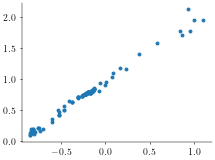

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(2, include_bias=False)
print(all_abg.shape)
features = poly.fit_transform(all_abg)
plt.scatter(all_abg[:,0], features[:,3])
plt.show()
plt.figure()
poly_reg_model = LinearRegression()
poly_reg_model.fit(features[train_idces,:], all_prep_idces[train_idces,:])
print(poly_reg_model.score(features[test_idces,:],all_prep_idces[test_idces,:]), poly_reg_model.coef_)
w_poly = poly_reg_model.coef_
print(w_poly)
b_poly = poly_reg_model.intercept_
print(w_poly.shape, features.shape)
pred_pis = features@w_poly.T
pis = all_prep_idces
r2 = 1 - np.var(pred_pis - pis)/np.var(pis)
print(r2)
plt.scatter(pred_pis, pis)
features_soc = poly.fit_transform(all_abg_soc)
features_skew = poly.fit_transform(all_abg_skew)
features_rdn = poly.fit_transform(all_abg_rdn)

(117,)
0.0 0.3237327342491267 0.0014387980146077124


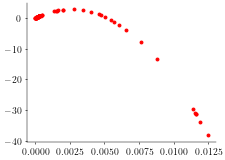

In [14]:
#order : beta, alpha, gamma
w_beta = np.array([w_poly[0,0], w_poly[0,3], w_poly[0,6], w_poly[0,7]])
w_alpha = np.array([w_poly[0,1], w_poly[0,4], w_poly[0,6], w_poly[0,8]])
w_gamma = np.array([w_poly[0,2], w_poly[0,5], w_poly[0,7],w_poly[0,8]])
print(all_betas.shape)
print(np.mean(all_alphas), np.mean(all_gammas), np.mean(all_betas))
beta_exp = np.concatenate([all_betas[None,:], all_betas[None,:]**2, all_betas[None,:]*0.02, all_betas[None,:]*0.3], axis=0)
alpha_exp = np.concatenate([all_alphas[None,:], all_alphas[None,:]**2, all_alphas[None,:]*0.001, all_alphas[None,:]*0.3], axis=0)
gamma_exp = np.concatenate([all_gammas[None,:], all_gammas[None,:]**2, all_gammas[None,:]*0.001, all_gammas[None,:]*0.02], axis=0)
#plt.scatter(all_alphas, w_alpha@alpha_exp, color = "b")
plt.scatter(all_betas, w_beta@beta_exp, color = "r")
#plt.scatter(all_gammas, w_gamma@gamma_exp, color = "g")

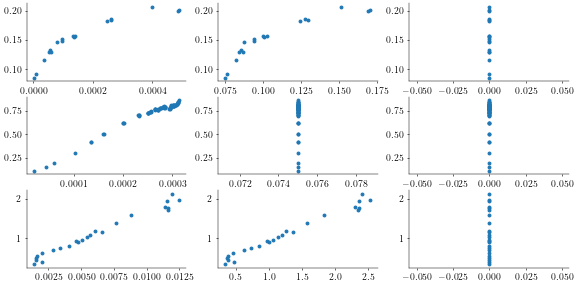

In [15]:
#visualize all of them independently
fig, axes = plt.subplots(3,3, figsize = (10, 5))

axes[0,0].scatter(b_rdn, p_rdn)
axes[0,1].scatter(g_rdn, p_rdn)
axes[0,2].scatter(a_rdn, p_rdn)
#############################
axes[1,0].scatter(b_skew, p_skew)
axes[1,1].scatter(g_skew, p_skew)
axes[1,2].scatter(a_skew, p_skew)
#############################
axes[2,0].scatter(b_soc, p_soc)
axes[2,1].scatter(g_soc, p_soc)
axes[2,2].scatter(a_soc, p_soc)

In [16]:
import scipy, sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
reg = LinearRegression()
cvs = cross_val_score(reg, all_abg, all_prep_idces, cv = cv)
print(cvs)
print(np.mean(cvs))


[0.95598358 0.96328181 0.98526736 0.96038549 0.95310929]
0.9636055055399307


0.9779045168806497 [[2193.45266386    0.          -10.40912629]]
[[2193.45266386]
 [   0.        ]
 [ -10.40912629]]
[0.92736122]
(75,) (24,) (18,)


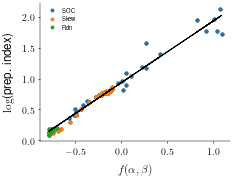

In [17]:
import scipy, sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(all_abg[train_idces,:], all_prep_idces[train_idces,:])
print(reg.score(all_abg[test_idces,:],all_prep_idces[test_idces,:]), reg.coef_)
#w = np.linalg.solve((all_abg.T@all_abg + 1E-6 * np.eye((np.shape(all_abg)[1]))), all_abg.T@all_prep_idces)
w = reg.coef_.T
print(w)
b = reg.intercept_
print(b)
plt.plot(all_abg@w, all_abg@w + b, 'k')
plt.scatter(all_abg@w, all_prep_idces, color='k')
plt.scatter(all_abg_soc@w, p_soc, label="SOC")
plt.scatter(all_abg_skew@w, p_skew, label = "Skew")
plt.scatter(all_abg_rdn@w, p_rdn, label = "Rdn")
plt.legend()
# plt.plot(all_abg@w, all_abg@w)
#plt.scatter(0,0,color= 'k')
plt.xlabel("$f(\\alpha, \\beta)$")
plt.ylabel("$\\log $(prep. index)")
plt.savefig("regression_ab_sum_g.pdf", bbox_inches="tight")
print(np.shape(p_skew), np.shape(p_soc), np.shape(p_rdn))

0.9320735821525584


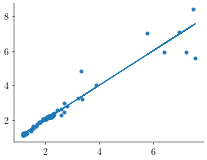

In [18]:
import scipy, sklearn
from sklearn.linear_model import LinearRegression
pred_pis = np.exp(all_abg@w + b)
pis = np.exp(all_prep_idces)
plt.scatter(pred_pis, pis)
plt.plot(pred_pis, pred_pis)
r2 = 1 - np.var(pred_pis - pis)/np.var(pis)
print(r2)

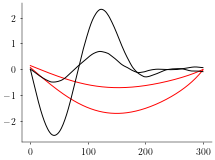

In [19]:
torque_tgt = np.loadtxt("/home/mmcs3/code/why-prep-2/tgt_torque")
torque_traj = np.loadtxt("/home/mmcs3/code/why-prep-2/torque_traj")
plt.plot(torque_traj, 'r')
plt.plot(torque_tgt, 'k')


(117, 9) (1,) (3, 1)
(150,) (150,)


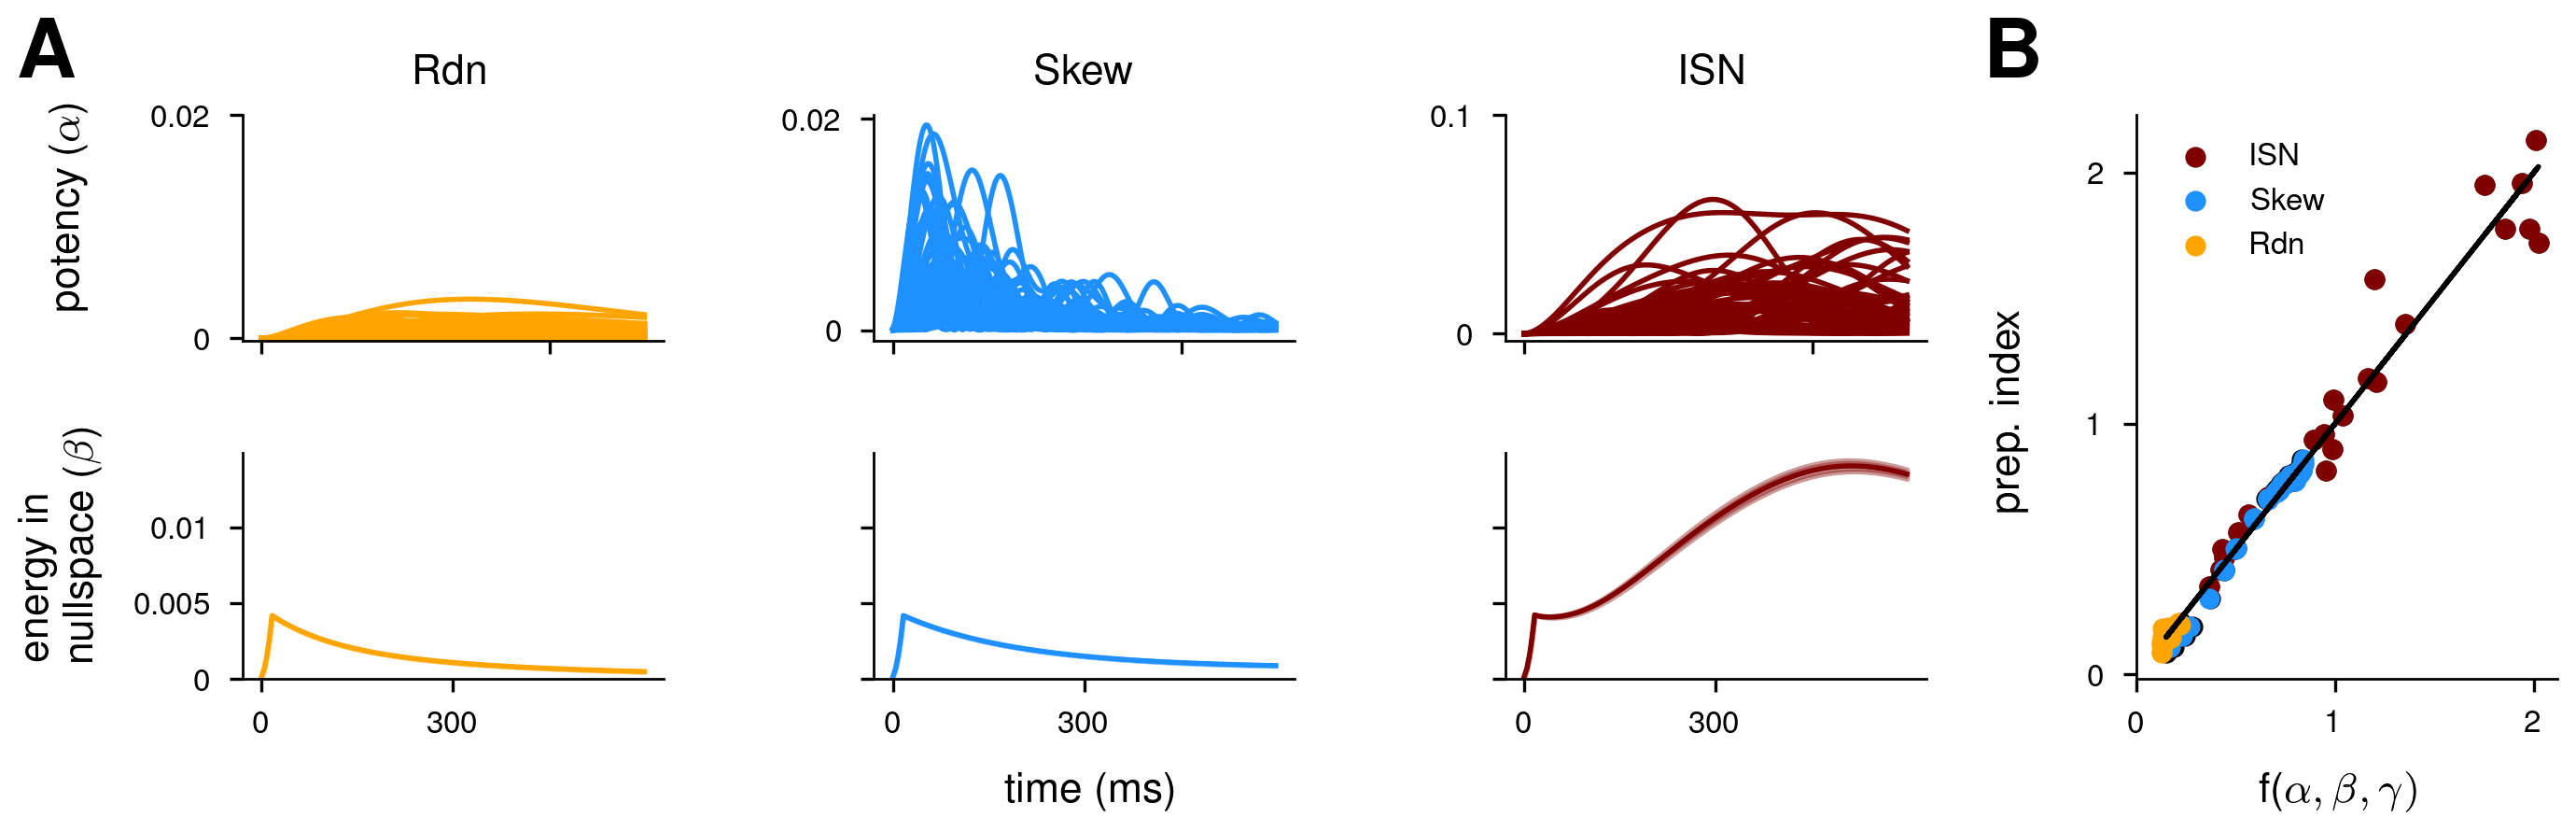

In [20]:
import scipy, sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(all_abg[train_idces,:], all_prep_idces[train_idces,:])
#w = np.linalg.solve((all_abg.T@all_abg + 1E-6 * np.eye((np.shape(all_abg)[1]))), all_abg.T@all_prep_idces)
w = reg.coef_.T
b = reg.intercept_
fig, axes = plt.subplots(2, 4, figsize = (8,2), dpi = 400)
plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.5)
ax_2 = axes[0,-1]
ax_22 = axes[1,-1]
pos2 = ax_2.get_position()
pos22 = ax_22.get_position()
color_skew = "dodgerblue"
color_soc = "maroon"
color_rdn = "orange"
#####################
ax_2.set_position([pos2.x0, pos22.y0, pos2.width, pos2.y0 - pos22.y0 + pos2.height])
print(features.shape, b.shape, w.shape)
ax_2.plot(all_abg@w + b, all_abg@w + b, 'k')
ax_2.scatter(all_abg@w + b, all_prep_idces, color='k')
ax_2.scatter(all_abg_soc@w + b,prep_idces, label="ISN", color = color_soc)
ax_2.scatter(features_skew@w_poly.T + b_poly,p_skew, label = "Skew", color = color_skew)
ax_2.scatter(features_rdn@w_poly.T + b_poly,p_rdn, label = "Rdn", color = color_rdn)
ax_2.legend()
axes[1,-1].axis('off')
#axes[2,-1].axis('off')
ax_2.set_xticks([0, 1, 2], [0,1,2], size = fs_m1)
ax_2.set_yticks([0, 1, 2], [0,1,2], size = fs_m1)
########################
n = 50
n_shift = 0
p = sns.color_palette("gray",200)
########################
t_rdn = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams_continuous_abg_2/rdn_0.8_0.0_potency")
t_skew = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams_continuous_abg_2/skew_6.7_0.0_potency") 
t_soc = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams_continuous_abg_2/soc_1.5_0.8_potency")
ymin, ymax = 0, 0.15
for i in range(n):
    axes[0,0].plot(t_rdn[:,i], color=color_rdn)
    axes[0,1].plot(t_skew[:,i], color=color_skew)
    axes[0,2].plot(t_soc[:,i], color=color_soc)
#axes[0,0].set_ylim(ymin, ymax)
#axes[0,1].set_ylim(ymin, ymax)
#axes[0,2].set_ylim(ymin, ymax)
#axes[0,0].set_ylabel("$\\alpha$")
#axes[1,0].set_ylabel("$\\beta$")
#axes[2,0].set_ylabel("$\\gamma$")
axes[0,0].set_title("Rdn", size = fs)
axes[0,0].set_yticks([0, 0.02], [0, 0.02], size = fs_m1)
axes[0,1].set_yticks([0, 0.02], [0, 0.02], size = fs_m1)
axes[0,2].set_yticks([0, 0.1], [0, 0.1], size = fs_m1)
########################
m_rdn = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/eval_rad_abg/proj_traj_mean_rdn_0.8_0.0_0_0")
m_skew = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/eval_rad_abg/proj_traj_mean_skew_10.0_0.0_0_0") 
m_soc = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/eval_rad_abg/proj_traj_mean_soc_2.0_0.8_0_0")
s_rdn = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/eval_rad_abg/proj_traj_std_rdn_0.8_0.0_0_0")
s_skew = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/eval_rad_abg/proj_traj_std_skew_10.0_0.0_0_0") 
s_soc = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/eval_rad_abg/proj_traj_std_soc_2.0_0.8_0_0")
ymin, ymax = 0, 0.0149
#for i in range(n):
axes[1,0].plot(np.linspace(0, 300, 150), m_rdn[:], color=color_rdn)
print(np.shape(m_rdn), np.shape(s_rdn))
axes[1,0].fill_between(np.linspace(0, 300, 150), m_rdn - 1.96*s_rdn, m_rdn + 1.96*s_rdn, color=color_rdn, alpha = 0.4)
axes[1,1].plot(np.linspace(0, 300, 150), m_skew[:], color=color_skew)
axes[1,1].fill_between(np.linspace(0, 300, 150),m_skew - 1.96*s_skew, m_skew + 1.96*s_skew, color=color_skew, alpha = 0.4)
axes[1,2].plot(np.linspace(0, 300, 150), m_soc[:], color=color_soc)
axes[1,2].fill_between(np.linspace(0, 300, 150),m_soc - 1.96*s_soc, m_soc + 1.96*s_soc, color=color_soc, alpha = 0.4)
axes[1,0].set_ylim(ymin, ymax)
axes[1,1].set_ylim(ymin, ymax)
axes[1,2].set_ylim(ymin, ymax)
axes[1,0].set_yticks([0, 0.005, 0.01], [0, 0.005, 0.01], size = fs_m1)
axes[1,1].set_yticks([0, 0.005, 0.01], [])
axes[1,2].set_yticks([0, 0.005, 0.01], [])
axes[0,1].set_title("Skew", size = fs)
axes[0,2].set_title("ISN", size = fs)
########################
'''t_rdn = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams_continuous_abg_2/rdn_0.8_0.0_torques")
t_skew = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams_continuous_abg_2/skew_6.7_0.0_torques") 
t_soc = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams_continuous_abg_2/soc_1.5_0.8_torques")
colors = ["orange", "black", "red", "yellow", "gray"]
ymin, ymax = -0.15, 0.22
for i in range(5):
    for j in range(2):
        axes[2,0].plot(t_rdn[:,2*i + j], color=colors[i])
        axes[2,1].plot(t_skew[:,2*i + j], color=colors[i])
        axes[2,2].plot(t_soc[:,2*i + j], color=colors[i])
axes[2,0].set_ylim(ymin, ymax)
axes[2,1].set_ylim(ymin, ymax)
axes[2,2].set_ylim(ymin, ymax)
axes[2,0].set_yticks([-0.1, 0.1], [-0.1, 0.1], size = fs_m1)
axes[2,1].set_yticks([-0.1, 0.1], [])
axes[2,2].set_yticks([-0.1, 0.1], [])
'''
#################################
#alpha : plot the projection of the inputs along the most controllable modes
#################################
#alpha : plot the projection of the activity along the most observable modes
##################################
#show samples torques for the SOC 
axes[1,1].set_xticks([0, 150], [0,300], size = fs_m1)
#axes[1,1].set_xticks([0, 150], [])
axes[0,1].set_xticks([0, 150], [])
axes[1,0].set_xticks([0, 150], [0,300], size = fs_m1)
#axes[1,0].set_xticks([0, 150], [])
axes[0,0].set_xticks([0, 150], [])
axes[1,2].set_xticks([0, 150], [0,300], size = fs_m1)
#axes[1,2].set_xticks([0, 150], [])
axes[0,2].set_xticks([0, 150], [])
fig.text(0.38, -0.04, "time (ms)", size = fs)
fig.text(0.8, -0.04, "f($\\alpha, \\beta, \\gamma)$", size = fs)
fig.text(0.71, 0.36, "prep. index", size = fs, rotation = "vertical")
fig.text(0.06, 0.63, "potency ($\\alpha$)", size = fs, rotation = "vertical")
fig.text(0.05, 0.16, "energy in \n nullspace ($\\beta$)", size = fs, rotation = "vertical")
#fig.text(0.05, 0.14, "natural \n output", size = fs, rotation = "vertical")
fig.text(0.05, 0.93, "$\\textbf{A}$", size = 16)
fig.text(0.71, 0.93, "$\\textbf{B}$", size = 16)
plt.savefig("regression_abg_attempt_2.pdf", bbox_inches="tight")

4.0 0.5661615050381931
6.0 0.9031507322397125
8.0 1.1509172854416536
10.0 1.2208992550889572
11.0 1.2635905330523896
12.5 1.377643473036311
14.0 1.4444544405492363
15.0 1.4750081487733868
17.0 1.4621758818316763


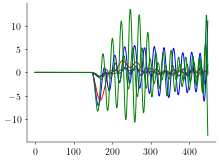

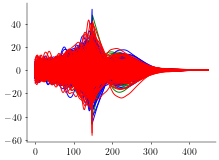

In [21]:
import numpy as np
sa = 0.0
rad = 17.0
nprep = 150
xs_10 = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.0000001/ramping_skew/sa_{sa}_rad_10.0/torques_0_300")
xs_14 = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.0000001/ramping_skew/sa_{sa}_rad_14.0/torques_0_300")
xs_17 = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.0000001/ramping_skew/sa_{sa}_rad_17.0/torques_0_300")
plt.plot(xs_10, "r")
plt.plot(xs_14, "b")
plt.plot(xs_17, "g")
plt.figure()
us_17 = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.0000001/ramping_skew/sa_{sa}_rad_17.0/us_0_300")
us_14 = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.0000001/ramping_skew/sa_{sa}_rad_14.0/us_0_300")
us_10 = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.0000001/ramping_skew/sa_{sa}_rad_10.0/us_0_300")
plt.plot(us_10, "g")
plt.plot(us_14, "b")
plt.plot(us_17, "r")
def pi(rad, n_tgt):
    us = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.0000001/ramping_skew/sa_{sa}_rad_{rad}/us_{n_tgt}_300")
    us_prep = us[:nprep]
    us_mov = us[nprep:]
    return np.linalg.norm(us_prep)**2/np.linalg.norm(us_mov)**2

for rad in [4.0, 6.0, 8.0, 10.0, 11.0, 12.5, 14.0, 15.0, 17.0]:
    print(rad, np.mean(np.asarray([pi(rad, i) for i in range(8)])))

In [22]:
######Analyses #########


def transfo_b(b):
    return b

def transfo_g(g):
    return g

def transfo_a(a):
    return 0*a + 1


def transfo_d(a):
    return 0*np.log(a)

def transfo_prep(p):
    p = np.asarray([pi for pi in p])
    return p

n = all_prep_idces.shape[0]
shuffled_idces = np.random.permutation(np.arange(n))
train_idces, test_idces = shuffled_idces[:int(n/3)], shuffled_idces[int(n/3):]
p_soc, p_skew, p_rdn = transfo_prep(prep_idces), transfo_prep(prep_idces_skew), transfo_prep(prep_idces_rdn)
g_soc, g_skew, g_rdn =transfo_g(soc_alphas_c_binned), transfo_g(skew_alphas_c_binned), transfo_g(rdn_alphas_c_binned)
a_soc, a_skew, a_rdn = transfo_a(soc_alphas_binned), transfo_a(skew_alphas_binned), transfo_a(rdn_alphas_c_binned)
b_soc, b_skew, b_rdn = transfo_b(soc_betas_binned), transfo_b(skew_betas_binned), transfo_b(rdn_betas_binned)
all_prep_idces = np.concatenate([p_soc, p_skew, p_rdn])[:,None]
z_prep_train = (all_prep_idces[train_idces,:] - np.mean(all_prep_idces[train_idces,:]))/np.std(all_prep_idces[train_idces,:])
z_prep_test = (all_prep_idces[test_idces,:] - np.mean(all_prep_idces[test_idces,:]))/np.std(all_prep_idces[test_idces,:])
z_prep= (all_prep_idces - np.mean(all_prep_idces))/np.std(all_prep_idces)
all_gammas = np.concatenate([g_soc, g_skew, g_rdn])
z_gamma_train = (all_gammas[train_idces] - np.mean(all_gammas[train_idces]))/np.std(all_gammas[train_idces])
z_gamma_test = (all_gammas[test_idces] - np.mean(all_gammas[test_idces]))/np.std(all_gammas[test_idces])
all_alphas = np.concatenate([a_soc, a_skew, a_rdn])
z_alpha_train = (all_alphas[train_idces] - np.mean(all_alphas[train_idces]))/np.std(all_alphas[train_idces])
z_alpha_test = (all_alphas[test_idces] - np.mean(all_alphas[test_idces]))/np.std(all_alphas[test_idces])
all_betas = np.concatenate([b_soc, b_skew, b_rdn])
z_beta_train = (all_betas[train_idces] - np.mean(all_betas[train_idces]))/np.std(all_betas[train_idces])
z_beta_test = (all_betas[test_idces] - np.mean(all_betas[test_idces]))/np.std(all_betas[test_idces])
z_abg_train = np.concatenate([z_beta_train[:,None], z_alpha_train[:,None], z_gamma_train[:,None]], axis=1)
z_b_train = np.concatenate([z_beta_train[:,None]], axis=1)
z_g_train = np.concatenate([z_gamma_train[:,None]], axis=1)
z_bg_train = np.concatenate([z_beta_train[:,None], z_gamma_train[:,None]], axis=1)
########
z_abg_test = np.concatenate([z_beta_test[:,None], z_alpha_test[:,None], z_gamma_test[:,None]], axis=1)
z_b_test = np.concatenate([z_beta_test[:,None]], axis=1)
z_g_test = np.concatenate([z_gamma_test[:,None]], axis=1)
z_bg_test = np.concatenate([z_beta_test[:,None], z_gamma_test[:,None]], axis=1)

######
z_b = (all_betas - np.mean(all_betas))/np.std(all_betas)
z_g = (all_gammas - np.mean(all_gammas))/np.std(all_gammas)

/tmp/ipykernel_3311678/860051772.py:36: RuntimeWarning: invalid value encountered in true_divide
  z_alpha_train = (all_alphas[train_idces] - np.mean(all_alphas[train_idces]))/np.std(all_alphas[train_idces])
/tmp/ipykernel_3311678/860051772.py:37: RuntimeWarning: invalid value encountered in true_divide
  z_alpha_test = (all_alphas[test_idces] - np.mean(all_alphas[test_idces]))/np.std(all_alphas[test_idces])


In [23]:
cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
reg = LinearRegression()
reg_bg = LinearRegression().fit(z_bg_train, z_prep_train)
score_bg = reg_bg.score(z_bg_test,z_prep_test)
print("bg : ", reg_bg.coef_, reg_bg.intercept_)
cvs = cross_val_score(reg, np.concatenate([z_bg_train, z_bg_test],axis=0),np.concatenate([z_prep_train, z_prep_test],axis=0), cv = cv)
print(np.mean(cvs), np.std(cvs))
mean_bg, sem_bg = np.mean(cvs), np.std(cvs)/np.sqrt(5)
reg_b = LinearRegression().fit(z_b_train, z_prep_train)
score_b = reg_b.score(z_b_test,z_prep_test)
print("b : ",reg_b.coef_, reg_b.intercept_)
cvs = cross_val_score(reg, np.concatenate([z_b_train, z_b_test],axis=0),np.concatenate([z_prep_train, z_prep_test],axis=0), cv = cv)
print(np.mean(cvs), np.std(cvs))
mean_b, sem_b = np.mean(cvs), np.std(cvs)/np.sqrt(5)
reg_g = LinearRegression().fit(z_g_train, z_prep_train)
score_g = reg_g.score(z_g_test,z_prep_test)
print("g : ",reg_g.coef_, reg_g.intercept_)
cvs = cross_val_score(reg, np.concatenate([z_g_train, z_g_test],axis=0),np.concatenate([z_prep_train, z_prep_test],axis=0), cv = cv)
print(np.mean(cvs), np.std(cvs))
mean_g, sem_g = np.mean(cvs), np.std(cvs)/np.sqrt(5)
print("Score \n")
print(score_b, score_g, score_bg)
reg_b_to_g = LinearRegression().fit(z_b_train, z_g_train)
score_b_to_g = reg_b_to_g.score(z_b_test,z_g_test)
print(score_b_to_g,reg_b_to_g.coef_)
print(scipy.stats.pearsonr(z_b, z_g))
z_b_soc = (b_soc - np.mean(all_betas))/np.std(all_betas)
z_b_skew = (b_skew - np.mean(all_betas))/np.std(all_betas)
z_b_rdn = (b_rdn - np.mean(all_betas))/np.std(all_betas)
z_g_soc = (g_soc - np.mean(all_gammas))/np.std(all_gammas)
z_g_skew = (g_skew - np.mean(all_gammas))/np.std(all_gammas)
z_g_rdn = (g_rdn - np.mean(all_gammas))/np.std(all_gammas)
z_prep_soc = (prep_idces - np.mean(all_prep_idces))/np.std(all_prep_idces)
z_prep_skew = (prep_idces_skew - np.mean(all_prep_idces))/np.std(all_prep_idces)
z_prep_rdn = (prep_idces_rdn - np.mean(all_prep_idces))/np.std(all_prep_idces)

bg :  [[ 16.6256031 -15.8599512]] [3.82275971e-15]
0.9783491946867604 0.012333271253201893
b :  [[0.77736871]] [2.27318838e-17]
0.5639413688850908 0.09094874554412749
g :  [[0.75336946]] [-1.51298507e-16]
0.521248855858833 0.09718563173327838
Score 

0.627563130153935 0.5918576111322047 0.9795229518388905
0.9985897684089311 [[0.99926123]]
(0.9992651733836632, 9.476312769814033e-165)


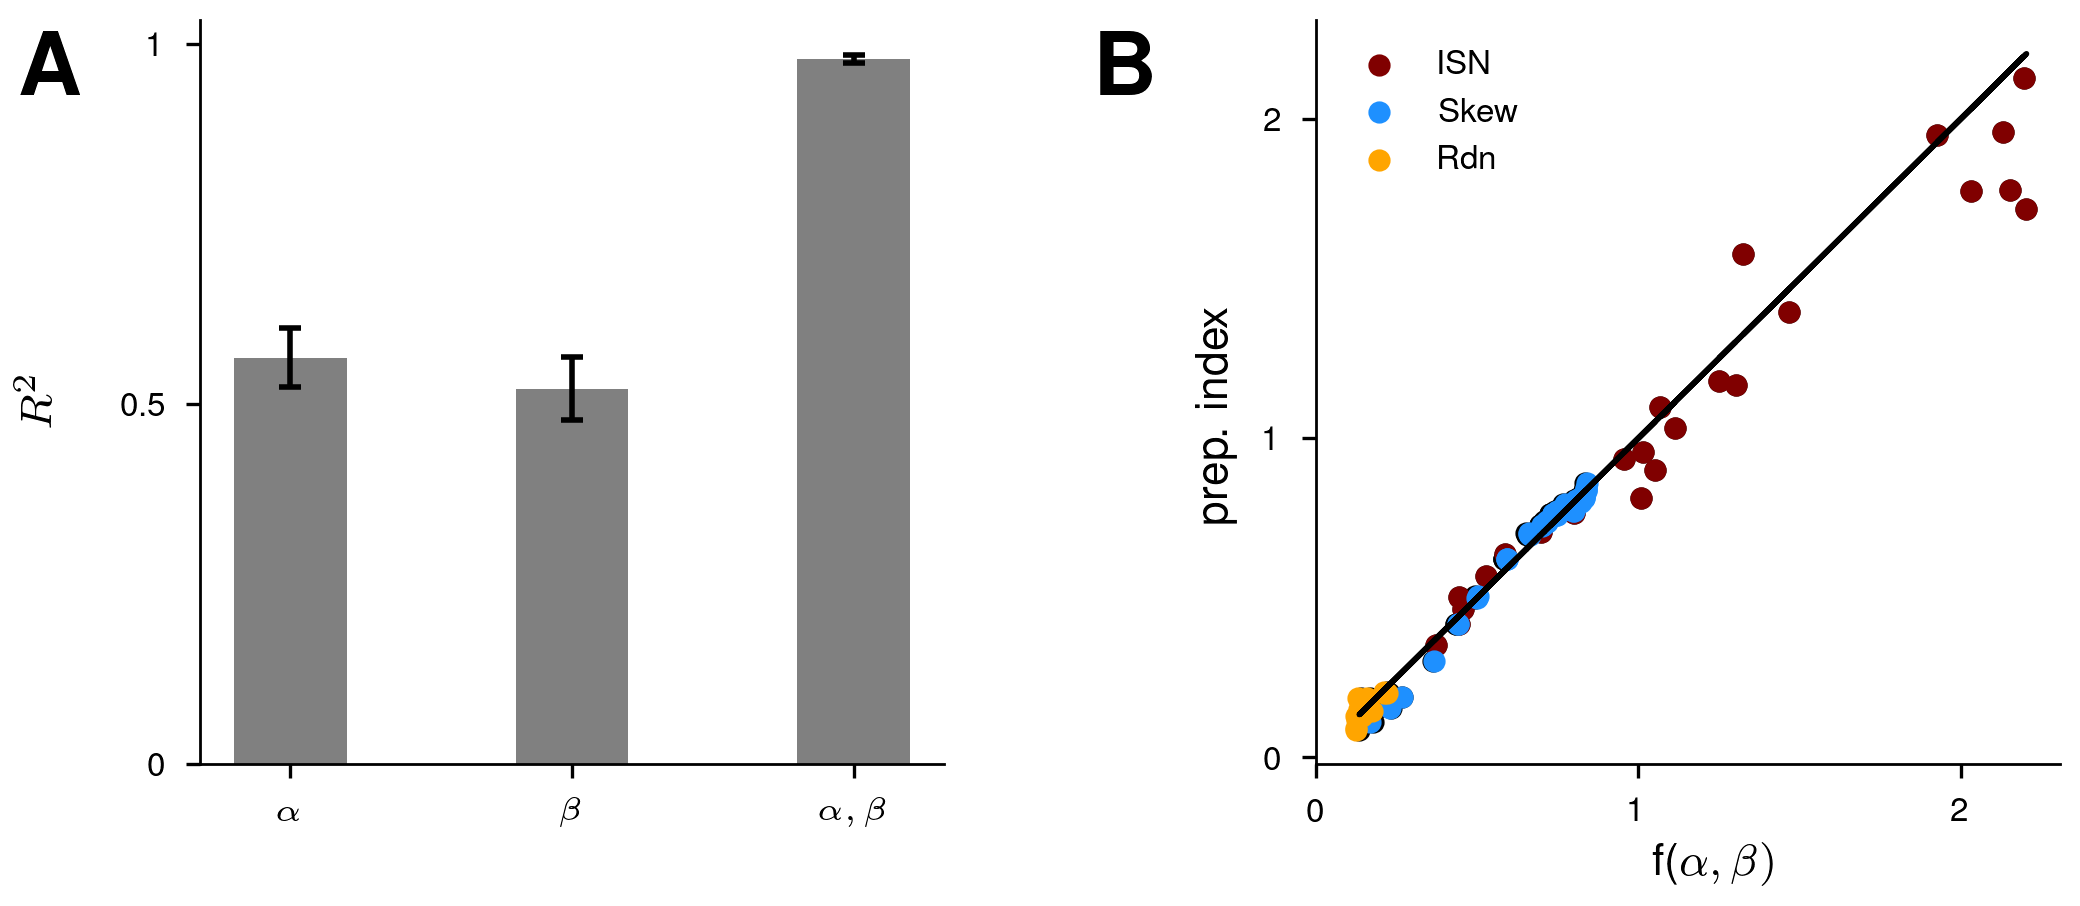

In [24]:
import scipy, sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(all_abg[train_idces,:], all_prep_idces[train_idces,:])
#w = np.linalg.solve((all_abg.T@all_abg + 1E-6 * np.eye((np.shape(all_abg)[1]))), all_abg.T@all_prep_idces)
w = reg.coef_.T
b = reg.intercept_
fig, axes = plt.subplots(1, 2, figsize = (6,3), dpi = 400)
plt.subplots_adjust(wspace = 0.5)
#ax_0 = axes[0]
#ax_0.set_box_aspect(1)
ax_1 = axes[0]
ax_1.set_box_aspect(1)
ax_2 = axes[-1]
pos2 = ax_2.get_position()
ax_2.set_box_aspect(1)
color_skew = "dodgerblue"
color_soc = "maroon"
color_rdn = "orange"
#####################
#ax_0.scatter(z_b_skew, z_prep_skew, color = color_skew, marker = "x")
#ax_0.scatter(z_b_soc, z_prep_soc, color = color_soc, marker = "x")
#ax_0.scatter(z_b_rdn, z_prep_rdn, color = color_rdn, marker = "x")
#ax_0.scatter(z_g_skew, z_prep_skew, color = color_skew, facecolors='none',marker = "o")
#ax_0.scatter(z_g_soc, z_prep_soc, color = color_soc, facecolors='none',marker = "o")
#ax_0.scatter(z_g_rdn, z_prep_rdn, color = color_rdn, facecolors='none',marker = "o")
#ax_0.scatter(z_g, z_prep)
"""ax_0.scatter(z_b_soc, z_g_soc, color = color_soc, marker = "o")
ax_0.scatter(z_b_skew, z_g_skew, color = color_skew,marker = "o")
ax_0.scatter(z_b_rdn, z_g_rdn, color = color_rdn,marker = "o")
ax_0.set_xticks([0, 2, 4], [0,2,4], size = fs_m1)
ax_0.set_yticks([0, 2, 4], [0,2,4], size = fs_m1)"""
#######################
ax_1.bar(0, mean_b, yerr=sem_b, width = 0.2, color='gray', ecolor='black', capsize=2,label="Prep.")
ax_1.bar(0.5, mean_g,  yerr=sem_g, width = 0.2, color='gray', ecolor='black', capsize=2,label="Move")
ax_1.bar(1, mean_bg,  yerr=sem_bg,width = 0.2, color='gray', ecolor='black', capsize=2,label="Move")
ax_1.set_xticks([0, 0.5, 1], ["$\\alpha$", "$\\beta$", "$\\alpha, \\beta$"], size = fs_m1)
ax_1.set_yticks([0, 0.5, 1], [0,0.5, 1], size = fs_m1)
#######################

ax_2.plot(all_abg@w + b, all_abg@w + b, 'k')
ax_2.scatter(all_abg@w + b, all_prep_idces, color='k')
ax_2.scatter(all_abg_soc@w + b,prep_idces, label="ISN", color = color_soc)
ax_2.scatter(features_skew@w_poly.T + b_poly,p_skew, label = "Skew", color = color_skew)
ax_2.scatter(features_rdn@w_poly.T + b_poly,p_rdn, label = "Rdn", color = color_rdn)
ax_2.legend()
#axes[2,-1].axis('off')
ax_2.set_xticks([0, 1, 2], [0,1,2], size = fs_m1)
ax_2.set_yticks([0, 1, 2], [0,1,2], size = fs_m1)
########################
#fig.text(0.22, 0.2, "$\\textrm{z}_\\alpha$", size = fs)
#fig.text(0.08, 0.5, "$\\textrm{z}_\\beta$", size = fs, rotation = "vertical")
fig.text(0.73, 0.1, "f($\\alpha, \\beta)$", size = fs)
fig.text(0.54, 0.40, "prep. index", size = fs, rotation = "vertical")
fig.text(0.05, 0.48, "$R^2$", size = fs, rotation = "vertical")
#fig.text(0.05, 0.14, "natural \n output", size = fs, rotation = "vertical")
fig.text(0.05, 0.75, "$\\textbf{A}$", size = 16)
fig.text(0.5, 0.75, "$\\textbf{B}$", size = 16)
#fig.text(0.67, 0.75, "$\\textbf{C}$", size = 16)
plt.savefig("regression_ab.pdf", bbox_inches="tight")

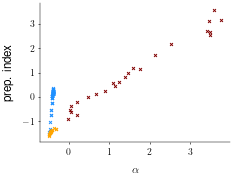

In [25]:
plt.scatter(z_b_skew, z_prep_skew, color = color_skew, marker = "x")
plt.scatter(z_b_soc, z_prep_soc, color = color_soc, marker = "x")
plt.scatter(z_b_rdn, z_prep_rdn, color = color_rdn, marker = "x")
plt.xlabel("$\\alpha$")
plt.ylabel("prep. index")
plt.savefig("alpha_prep.pdf", bbox_inches = "tight")